In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
dtype = {
    'ResponseID': 'category',
    'UserID': 'int8',
    'Intervention': 'int8',
    'PedPed': 'int8',
    'Barrier': 'int8',
    'CrossingSignal': 'int8',
    'AttributeLevel': 'category',
    'ScenarioTypeStrict': 'category',
    'NumberOfCharacters': 'int8',
    'DiffNumberOFCharacters': 'int8',
    'Saved': 'int8',
    'Man': 'int8',
    'Woman': 'int8',
    'Pregnant': 'int8',
    'Stroller': 'int8',
    'OldMan': 'int8',
    'OldWoman': 'int8',
    'Boy': 'int8',
    'Girl': 'int8',
    'Homeless': 'int8',
    'LargeWoman': 'int8',
    'LargeMan': 'int8',
    'Criminal': 'int8',
    'MaleExecutive': 'int8',
    'FemaleExecutive': 'int8',
    'FemaleAthlete': 'int8',
    'MaleAthlete': 'int8',
    'FemaleDoctor': 'int8',
    'MaleDoctor': 'int8',
    'Dog': 'int8',
    'Cat': 'int8'
}


In [3]:
# load data

df_total = pd.read_csv('total_nw_dataset.csv', dtype=dtype)

In [4]:
# ensuring that ScenarioTypeStrict is clean
# DIT MOET EIGENLIJK IN PREPROCESSING!!!


df_total['ScenarioTypeStrict'].replace('Social Value', 'Social Status', inplace=True)
print(df_total['ScenarioTypeStrict'].value_counts())

ScenarioTypeStrict
Utilitarian      2881272
Species          2833884
Age              2833146
Fitness          2829872
Gender           2826762
Social Status     473462
Name: count, dtype: int64


In [5]:
df_total.shape

(14678398, 31)

In [6]:
df_total.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,res_03117225,0,1,1,0,1,Male,Gender,3,0,...,1,0,1,0,0,0,0,1,0,0
1,res_00438778,0,1,1,0,2,Hoomans,Species,5,0,...,1,0,0,0,0,1,0,0,0,0
2,res_05568749,0,0,1,0,0,Less,Utilitarian,1,4,...,0,0,0,0,0,0,0,0,0,0
3,res_00035908,1,0,0,1,0,Male,Gender,5,0,...,0,0,1,0,0,1,0,0,0,0
4,res_04559409,0,1,0,1,0,More,Utilitarian,5,2,...,0,0,0,0,1,0,0,0,0,0


In [7]:
df_total['UserID'].value_counts()

UserID
0    14384830
1      293568
Name: count, dtype: int64

In [8]:
# checking how many different categories are in the categorical columns
print(len(df_total['AttributeLevel'].value_counts()))
print(len(df_total['ScenarioTypeStrict'].value_counts()))

13
6


In [9]:
# with one hot encoding, this means that there will be 19 (!) extra columns

In [9]:
# preprocessing

# one-hot encode the AttributeLevel and ScenarioTypeStrict
df_total_encoded = pd.get_dummies(df_total, columns=['AttributeLevel', 'ScenarioTypeStrict'])

print(df_total_encoded.columns)


Index(['ResponseID', 'UserID', 'Intervention', 'PedPed', 'Barrier',
       'CrossingSignal', 'NumberOfCharacters', 'DiffNumberOFCharacters',
       'Saved', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman',
       'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal',
       'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete',
       'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat', 'AttributeLevel_Fat',
       'AttributeLevel_Female', 'AttributeLevel_Fit', 'AttributeLevel_High',
       'AttributeLevel_Hoomans', 'AttributeLevel_Less', 'AttributeLevel_Low',
       'AttributeLevel_Male', 'AttributeLevel_More', 'AttributeLevel_Old',
       'AttributeLevel_Pets', 'AttributeLevel_Rand', 'AttributeLevel_Young',
       'ScenarioTypeStrict_Age', 'ScenarioTypeStrict_Fitness',
       'ScenarioTypeStrict_Gender', 'ScenarioTypeStrict_Social Status',
       'ScenarioTypeStrict_Species', 'ScenarioTypeStrict_Utilitarian'],
      dtype='object')


In [10]:
print(len(df_total_encoded.columns))

48


In [ ]:
# rule of thumb is to have at least 10 times the amount of data points as there are features


In [38]:
df_total_encoded.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,NumberOfCharacters,DiffNumberOFCharacters,Saved,Man,...,AttributeLevel_Old,AttributeLevel_Pets,AttributeLevel_Rand,AttributeLevel_Young,ScenarioTypeStrict_Age,ScenarioTypeStrict_Fitness,ScenarioTypeStrict_Gender,ScenarioTypeStrict_Social Status,ScenarioTypeStrict_Species,ScenarioTypeStrict_Utilitarian
0,res_03117225,0,1,1,0,1,3,0,1,0,...,False,False,False,False,False,False,True,False,False,False
1,res_00438778,0,1,1,0,2,5,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,res_05568749,0,0,1,0,0,1,4,0,0,...,False,False,False,False,False,False,False,False,False,True
3,res_00035908,1,0,0,1,0,5,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,res_04559409,0,1,0,1,0,5,2,1,0,...,False,False,False,False,False,False,False,False,False,True


In [39]:
# Convert response_ID to a numeric sequential range
df_total_encoded['response_ID_mapped'] = df_total_encoded['ResponseID'].astype('category').cat.codes

# Optionally, drop the original response_ID column
df_total_encoded = df_total_encoded.drop('ResponseID', axis=1)


In [40]:
df_total_encoded.head()

,UserID,Intervention,PedPed,Barrier,CrossingSignal,NumberOfCharacters,DiffNumberOFCharacters,Saved,Man,Woman,...,AttributeLevel_Pets,AttributeLevel_Rand,AttributeLevel_Young,ScenarioTypeStrict_Age,ScenarioTypeStrict_Fitness,ScenarioTypeStrict_Gender,ScenarioTypeStrict_Social Status,ScenarioTypeStrict_Species,ScenarioTypeStrict_Utilitarian,response_ID_mapped
0,0,1,1,0,1,3,0,1,0,0,...,False,False,False,False,False,True,False,False,False,13951
1,0,1,1,0,2,5,0,0,0,1,...,False,False,False,False,False,False,False,True,False,1946
2,0,0,1,0,0,1,4,0,0,1,...,False,False,False,False,False,False,False,False,True,24955
3,1,0,0,1,0,5,0,0,0,0,...,False,False,False,False,False,True,False,False,False,165
4,0,1,0,1,0,5,2,1,0,1,...,False,False,False,False,False,False,False,False,True,20370


In [41]:
# Prepare features and target variable
X = df_total_encoded.drop(['UserID', 'response_ID_mapped'], axis=1)   # Features
y = df_total_encoded['UserID']                # Target variable

In [42]:
# Split the data into train, validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.111111111111, random_state=42)

### Logistic Regression (98-2)

In [43]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Make predictions
y_pred = model.predict(X_val)

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.9800816165249618


In [46]:
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[1438541       0]
 [  29237      62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1438541
           1       1.00      0.00      0.00     29299

    accuracy                           0.98   1467840
   macro avg       0.99      0.50      0.50   1467840
weighted avg       0.98      0.98      0.97   1467840



In [ ]:
# op basis van accuracy is hij wel beter al op de nw dataset, dus cultuur doet wel iets wss

### Random Forest (98-2)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test data
y_pred = rf_model.predict(X_val)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.985128488118596


In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1437715     826]
 [  21003    8296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99   1438541
           1       0.91      0.28      0.43     29299

    accuracy                           0.99   1467840
   macro avg       0.95      0.64      0.71   1467840
weighted avg       0.98      0.99      0.98   1467840



### SVM (98-2)

In [ ]:
"PCA"

In [29]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

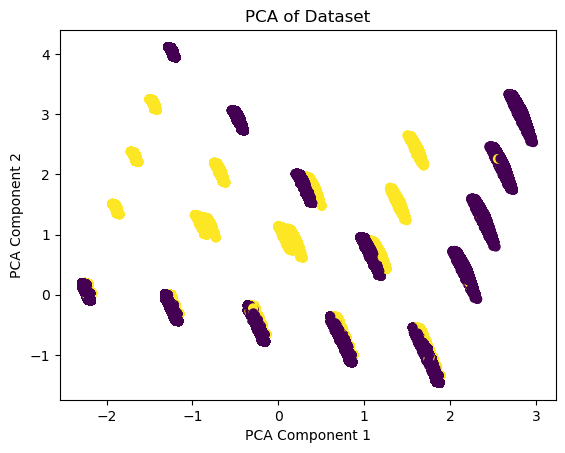

In [30]:
# Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Dataset')
plt.show()

In [ ]:
# doesn't seem to be linearly seperable tbh

In [31]:
from sklearn.svm import SVC

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly', etc.

In [ ]:
# Train the model
svm_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report)
